In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import binom_test
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
import statistics 

In [2]:
module_roi = "../../06_21_2020/ESP/esp_measures_Module.csv"
line_roi = "../../06_21_2020/ESP/esp_measures_Line.csv"

df_module = pd.read_csv(module_roi)
df_line = pd.read_csv(line_roi)

df = df_module.join(df_line.set_index(c.PROJECT), on=c.PROJECT, rsuffix='_LINE')
roi_df = df[["Annualized_ESP", "Annualized_ROI_LINE"]]
roi_df.head()

,Annualized_ESP,Annualized_ROI_LINE
0,-0.044,-0.512
1,-0.547,-0.676
2,1.329,-0.632
3,0.913,0.146
4,2.132,9.367


In [3]:
roi_df["ROI_MEAN"] = roi_df.mean(axis=1)
roi_df.head()

,Annualized_ESP,Annualized_ROI_LINE,ROI_MEAN
0,-0.044,-0.512,-0.2780
1,-0.547,-0.676,-0.6115
2,1.329,-0.632,0.3485
3,0.913,0.146,0.5295
4,2.132,9.367,5.7495


In [4]:
df["ROI_MEAN"] = roi_df["ROI_MEAN"]

In [5]:
PROJECT_LIST = [
  "angular"
  ,"node"
  ,"neutron"
  ,"vue"
  ,"home-assistant"
  ,"tensorflow"
  ,"moby"
  ,"gitlabhq"
  ,"orleans"
  ,"roslyn"
  ,"ansible"
  ,"cli"
  ,"nova"
  ,"angular.js"
  ,"lock"
  ,"kubernetes"
  ,"mesos"
  ,"Odin"
  ,"nixpkgs"
  ,"react"
  ,"brew"
  ,"cinder"
  ,"elasticsearch"
  ,"linux"
  ,"cf-deployment"
  ,"office-js"
]


popular_projects = df[df[c.PROJECT].isin(PROJECT_LIST)]
len(popular_projects)

26

In [6]:
positive_roi = popular_projects[popular_projects["ROI_MEAN"] >= 0].sort_values(by="ROI_MEAN")
len(positive_roi)

16

In [7]:
percent_positive = len(positive_roi) /  len(popular_projects)
percent_positive

0.6153846153846154

In [8]:
print("Annualized ESP Mean: {0}".format(popular_projects["ROI_MEAN"].mean()))
print("Annualized ESP Min: {0}".format(popular_projects["ROI_MEAN"].min()))
print("Annualized ESP Max: {0}".format(popular_projects["ROI_MEAN"].max()))

Annualized ESP Mean: 0.8981153846153845
Annualized ESP Min: -0.6114999999999999
Annualized ESP Max: 5.7495


Text(0, 0.5, 'Count')

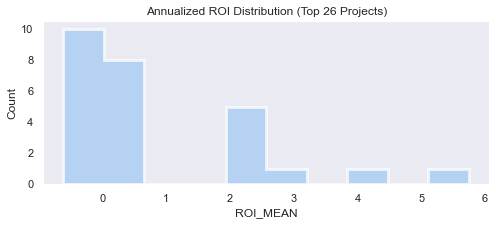

In [9]:
plt.figure(figsize=(8,3))
plt.tight_layout()

sb.set(style="dark", palette="pastel")
ax = sb.distplot(popular_projects["ROI_MEAN"], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3}, bins=10)
ax.set_title('Annualized ESP Distribution (Top 26 Projects)')
plt.ylabel("Count")

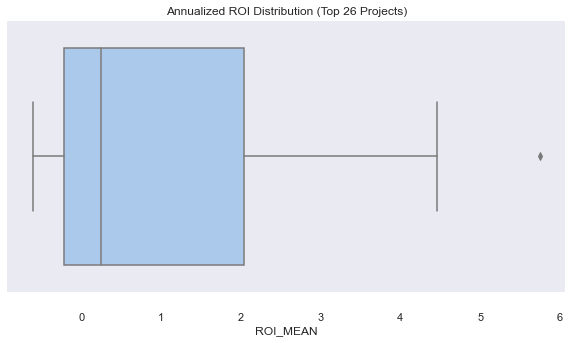

In [15]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ROI_MEAN", data=popular_projects)
ax.set_title('Annualized ESP Distribution (Top 26 Projects)')
sb.despine(offset=10, trim=True)
plt.show()

In [10]:
negative_roi = popular_projects[popular_projects["ROI_MEAN"] < 0].sort_values(by="Project")
negative_roi.head(13)

,Project,Model,Effort_Incurred,Effort_Saved,Net_Effort_Saved,ESP,Annualized_ESP,Model_LINE,Effort_Incurred_LINE,Amount_Returned_LINE,Net_Effort_Saved_LINE,ROI_LINE,Annualized_ROI_LINE,ROI_MEAN
62,Odin,Module,12680.00,4960.00,-7720.00,-0.609,-0.269,Line,482620.00,66080.00,-416540.00,-0.863,-0.484,-0.3765
0,cli,Module,8827.82,7712.93,-1114.89,-0.126,-0.044,Line,1472976.70,170553.12,-1302423.58,-0.884,-0.512,-0.2780
17,kubernetes,Module,23821.90,5869.32,-17952.58,-0.754,-0.373,Line,885635.00,743957.00,-141678.00,-0.160,-0.056,-0.2145
13,mesos,Module,24352.55,13838.72,-10513.83,-0.432,-0.172,Line,1059935.54,409553.06,-650382.48,-0.614,-0.272,-0.2220
6,moby,Module,2341.51,164.00,-2177.51,-0.930,-0.588,Line,68405.63,28208.00,-40197.63,-0.588,-0.256,-0.4220
52,nixpkgs,Module,195909.92,176186.19,-19723.73,-0.101,-0.035,Line,7535946.19,3605117.25,-3930828.94,-0.522,-0.218,-0.1265
9,node,Module,398121.57,113352.59,-284768.98,-0.715,-0.342,Line,27468832.48,6067025.49,-21401806.99,-0.779,-0.395,-0.3685
22,office-js,Module,17969.73,13304.00,-4665.73,-0.260,-0.095,Line,1359800.09,132124.00,-1227676.09,-0.903,-0.541,-0.3180
1,orleans,Module,7023.23,652.80,-6370.43,-0.907,-0.547,Line,174167.97,5849.20,-168318.77,-0.966,-0.676,-0.6115
5,vue,Module,24161.72,34320.00,10158.28,0.420,0.124,Line,2692398.87,320320.00,-2372078.87,-0.881,-0.508,-0.1920


In [11]:
count = len(positive_roi.values)
nobs = len(popular_projects.values)
prop = .90
alternative = 'smaller'
print(count)
print(nobs)
print(prop)

16
26
0.9


In [12]:
# Test if central limit theorem kicks in
# https://cran.r-project.org/web/packages/distributions3/vignettes/one-sample-z-test-for-proportion.html
# https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/a/conditions-inference-one-proportion
n = nobs
p = count/nobs
print((n*p) > 5)
print((n*(1-p)) > 5)

True
True


In [13]:
stat, pvalue = proportions_ztest(count, nobs, prop, alternative='smaller')
print('{0:0.5f}'.format(pvalue))

0.00143


In [14]:
pvalue = binom_test(count, nobs, prop, alternative='smaller')
print('{0:0.5f}'.format(pvalue))

0.00012
